<a href="https://colab.research.google.com/github/apal9569/GAN/blob/master/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget http://files.fast.ai/data/dogscats.zip

--2019-05-23 07:23:25--  http://files.fast.ai/data/dogscats.zip
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857214334 (818M) [application/zip]
Saving to: ‘dogscats.zip’

dogscats.zip        100%[===================>] 817.50M  90.8MB/s    in 8.2s    

2019-05-23 07:23:33 (99.9 MB/s) - ‘dogscats.zip’ saved [857214334/857214334]



In [0]:
!unzip dogscats.zip

In [0]:
import numpy as np

In [0]:
path="dogscats/"

In [0]:
!ls {path}


In [0]:
!ls {path}train

In [0]:
files1=!ls {path}train/cats
file=[]
for i in range(700):
  f=files1[i].split()
  file.append(f)
len(file[1])
files1.remove

<function SList.remove>

In [0]:
file=np.array(file)


In [0]:
n,m=file.shape
m

5

In [0]:
imgs=[]
import cv2
for i in range(n):
  for j in range(m):
    img=cv2.imread(f'{path}train/cats/{file[i,j]}')
    img=cv2.resize(img,(128,128))
    #img = img.astype(np.float32) / 127.5 - 1.0
    imgs.append(img)
imgs=np.array(imgs)


In [0]:
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

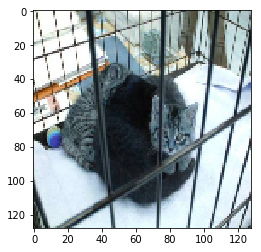

In [0]:
plt.imshow(imgs[1])

In [0]:
img.shape

(128, 128, 3)

In [0]:
import keras
import os
import matplotlib.pyplot as plt
from keras import layers
from keras.layers import *
from keras.models import Model
from keras.preprocessing.image import load_img,img_to_array
#from keras.applications.vgg19 import preprocess_input
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.optimizers import RMSprop
import pandas as pd
import string
from collections import Counter
from copy import copy

Using TensorFlow backend.


In [0]:
def generator():
  img=Input(shape=[128,])
  
  model2=Dense(2048,input_dim=128)(img)
  model2=BatchNormalization()(model2)
  model2=Reshape(target_shape=(4, 4, 128))(model2)
  
  model2=Conv2DTranspose(64, 5, strides=2,padding='same')(model2)
  model2=BatchNormalization()(model2)
  
  model2=Conv2DTranspose(32, 5, strides=2,padding='same')(model2)
  model2=BatchNormalization()(model2)
  model2=Conv2DTranspose(32, 5, strides=2,padding='same')(model2)
  model2=BatchNormalization()(model2)
  
  model2=Conv2DTranspose(16, 5, strides=2,padding='same')(model2)
  model2=BatchNormalization()(model2)
  
  model2=Conv2DTranspose(16, 5, strides=2,padding='same')(model2)
  model2=BatchNormalization()(model2)
  model2=LeakyReLU(0.2)(model2)
  
  model2=SeparableConv2D(3,5,padding='same',activation='tanh')(model2)
    
  return Model(inputs=img,outputs=model2)
  

In [0]:
def discriminator():
  img=Input(shape=[128,128,3])
  
  model1=SeparableConv2D(16, (3,3), padding='same')(img)
  model1=BatchNormalization()(model1)
  model1=SeparableConv2D(32,(3,3),padding='same')(model1)
  model1=BatchNormalization()(model1)
  model1=SeparableConv2D(32,(3,3),padding='same')(model1)
  model1=BatchNormalization()(model1)
  model1=SeparableConv2D(64,(3,3),padding='same')(model1)
  model1=BatchNormalization()(model1)
  model1=SeparableConv2D(64,(3,3),padding='same')(model1)
  model1=BatchNormalization()(model1)
  model1=SeparableConv2D(128,(3,3),padding='same')(model1)
  model1=BatchNormalization()(model1)
  model1=LeakyReLU(0.2)(model1)
  
  model1=GlobalAveragePooling2D()(model1)
  model1=Dense(1,activation='sigmoid')(model1)
  return Model(inputs=img,output=model1)

In [0]:
def complete():
  disc=discriminator()
  disc.compile(loss='binary_crossentropy',optimizer='RMSprop',metrics=['mae'])
  
  gen=generator()
  
  gan = keras.Sequential()
  gan.add(gen)
  gan.add(disc)
  disc.trainable = False 
  gan.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['mae'])
  
  return disc,gen,gan

In [0]:
def training(epochs=1000,k=50):
  
  for epoch in range(epochs):
    for i in range(k):
      real=imgs[np.random.randint(0,imgs.shape[0], size=64)]
      
      noise=np.random.randn(64,128)
      fake=gen.predict(noise)
      #print(fake.shape)
      
      pred_real=disc.train_on_batch(real, np.ones([64]))[1]
      pred_fake=disc.train_on_batch(fake, np.zeros([64]))[1]
      
    y=np.ones([64,1])
    noise=np.random.randn(64,128)  
    gan_pred=gan.train_on_batch(noise,y)[1]
    print(epoch)
    
    

In [0]:
disc,gen,gan=complete()
disc.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 128, 128, 16)      91        
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 16)      64        
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 128, 128, 32)      688       
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
separable_conv2d_3 (Separabl (None, 128, 128, 32)      1344      
_________________________________________________________________
batch_normalization_3 (Batch (None, 128, 128, 32)      128       
__________

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [0]:
gen.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2048)              264192    
_________________________________________________________________
batch_normalization_7 (Batch (None, 2048)              8192      
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 8, 8, 64)          204864    
_________________________________________________________________
batch_normalization_8 (Batch (None, 8, 8, 64)          256       
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 16, 16, 32)        51232     
__________

In [0]:
training()

In [0]:
samples=7
plt.figure(figsize=(sample * 3, 3))

for i in range(samples):
    noise = np.random.randn(1, 128) 
    pred = gen.predict(noise)[0]
    plt.subplot(1, NUM, i + 1)
    plt.imshow(pred)
plt.show()